In [1]:
import sys
sys.path.append('/disk2/yhy/Work/stock/smm/src/utils/')
from configure import *
from mod_dataprep import *

import sklearn
from sklearn.covariance import EllipticEnvelope, EmpiricalCovariance, MinCovDet

In [2]:
#dowjones = ['MMM', 'AXP', 'AAPL', 'BA', 'CAT', 'CVX', 'CSCO', 'KO', 'DIS', 'DWDP', 
#       'XOM', 'GE', 'GS', 'HD', 'IBM', 'INTC', 'JNJ', 'JPM', 'MCD', 'MRK', 
#       'MSFT', 'NKE', 'PFE', 'PG', 'TRV', 'UTX', 'UNH', 'VZ', 'V', 'WMT']
ss = getmulquote(['AAPL', 'BA'])
print(len(ss), ss.keys())

2 dict_keys(['AAPL', 'BA'])


,AAPL,BA
datetime,,
2010-01-04,0.015445,0.037172
2010-01-05,0.001727,0.032227
2010-01-06,-0.016034,0.029884
2010-01-07,-0.001850,0.039684
2010-01-08,0.006626,-0.009693
2010-01-11,-0.008861,-0.011921
2010-01-12,-0.011440,-0.007255
2010-01-13,0.014007,0.012008
2010-01-14,-0.005808,0.006519


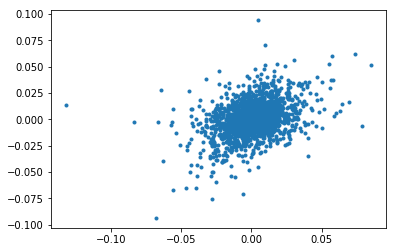

In [36]:
# selete stocks from given time period
def select_timeperiod(quotes, time=['2010-01-01', '2018-05-01'], var='logreturn_1'):
    tmp = {}
    for sym in quotes.keys():
        quote = add_datetime(quotes[sym])
        quote.index = quote['datetime']
        tmp[sym] = quote.loc[time[0]:time[1], var]
    return pd.DataFrame(tmp)

for sym in ss:
    ss[sym] = add_logreturn(ss[sym])
tb = select_timeperiod(ss)
plt.plot(tb['AAPL'], tb['BA'], '.')

tb

[[2.59147020e-04 9.21851531e-05]
 [9.21851531e-05 2.26559313e-04]]
[[1.32036036e-04 3.85325735e-05]
 [3.85325735e-05 1.25962749e-04]]
1876
2096 1049.5


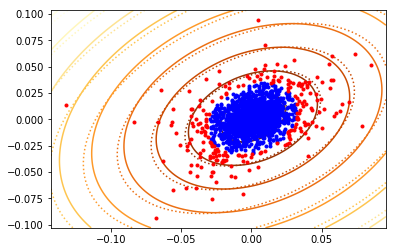

In [68]:
emp_cov = EmpiricalCovariance().fit(np.array(tb))
print( emp_cov.covariance_ )

rob_cov = MinCovDet().fit(np.array(tb))
print( rob_cov.covariance_ )
print( sum(rob_cov.support_) )

print(len(tb), (len(tb)+2+1)/2 )

plt.plot(tb.iloc[rob_cov.support_,0], tb.iloc[rob_cov.support_,1], 'b.')
plt.plot(tb.iloc[~rob_cov.support_,0], tb.iloc[~rob_cov.support_,1], 'r.')

xx, yy = np.meshgrid(np.linspace(plt.xlim()[0], plt.xlim()[1], 100),
                     np.linspace(plt.ylim()[0], plt.ylim()[1], 100))
zz = np.c_[xx.ravel(), yy.ravel()]
mahal_emp_cov = emp_cov.mahalanobis(zz)
mahal_emp_cov = mahal_emp_cov.reshape(xx.shape)
plt.contour(xx, yy, np.sqrt(mahal_emp_cov), 10,
                                 cmap=plt.cm.YlOrBr_r, linestyles='dotted')

mahal_emp_cov = rob_cov.mahalanobis(zz)
mahal_emp_cov = mahal_emp_cov.reshape(xx.shape)
plt.contour(xx, yy, np.sqrt(mahal_emp_cov), 10,
                                 cmap=plt.cm.YlOrBr_r, linestyles='solid')


[[2.94189028e-04 7.04253028e-05]
 [7.04253028e-05 2.37868958e-04]]
threshold =  -0.4649002187432508
[[1.31627975e-04 3.95990284e-05]
 [3.95990284e-05 1.24450916e-04]]
1870
2096 1049.5


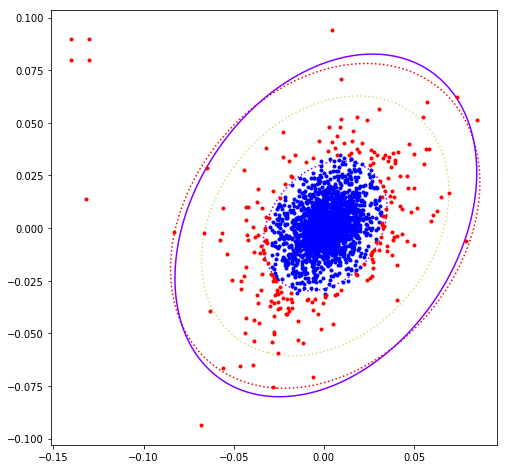

In [117]:
from scipy import stats

tb.iloc[0,:] = [-0.14, 0.09]
tb.iloc[1,:] = [-0.13, 0.09]
tb.iloc[2,:] = [-0.14, 0.08]
tb.iloc[3,:] = [-0.13, 0.08]

emp_cov = EmpiricalCovariance().fit(np.array(tb))
print( emp_cov.covariance_ )

clf = EllipticEnvelope( contamination=0.01)
ee_cov = clf.fit(np.array(tb))
scores_pred = clf.decision_function(np.array(tb))
threshold = stats.scoreatpercentile(scores_pred,
        100 * 0.005)
print('threshold = ', threshold)
print( ee_cov.covariance_ )
print( sum(ee_cov.support_) )

print(len(tb), (len(tb)+2+1)/2 )
plt.figure(2, figsize=(8,8))
plt.plot(tb.iloc[ee_cov.support_,0], tb.iloc[ee_cov.support_,1], 'b.')
plt.plot(tb.iloc[~ee_cov.support_,0], tb.iloc[~ee_cov.support_,1], 'r.')

xx, yy = np.meshgrid(np.linspace(plt.xlim()[0], plt.xlim()[1], 100),
                     np.linspace(plt.ylim()[0], plt.ylim()[1], 100))
zz = np.c_[xx.ravel(), yy.ravel()]
mahal_emp_cov = emp_cov.mahalanobis(zz)
mahal_emp_cov = mahal_emp_cov.reshape(xx.shape)
plt.contour(xx, yy, np.sqrt(mahal_emp_cov), [2, 4, 5],
                                 cmap=plt.cm.rainbow, linestyles='dotted')

#mahal_emp_cov = ee_cov.mahalanobis(zz)

mahal_emp_cov = clf.decision_function(zz).reshape(xx.shape)
plt.contour(xx, yy, mahal_emp_cov, [threshold],
                                 cmap=plt.cm.rainbow, linestyles='solid')
